In [28]:
import numpy as np
import os

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# Plotting library
from matplotlib import pyplot

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [29]:
def weight_evaluation_using_bell_shaped_kernel(x0, x, y, tau):
    m = len(x)
    w = np.array([np.exp(- ( x[i]-x0)**2/(2*tau)) for i in range(m)])
    return w
    

def computeCostWithWeightedKernel(X, y, w, theta):
   m=y.size
   #s=np.sum(np.square(np.dot(X,theta)-y))
   s=w*(np.dot(X,theta)-y)
   j=(1/(2*m))*(np.dot(np.transpose(s),s))
   #j=(1/2*m)*s
   return j

def gradientDescentWithWeightedKernel(X, y, w, theta, alpha, num_iters):
    m = float(y.shape[0])
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        #theta=(theta)-(alpha/m)*(np.dot(np.transpose((np.dot(X,theta)-y)),X))
        theta=(theta)-(alpha/m)*(np.dot(np.transpose((w*(np.dot(X,theta)-y)),X)))
        J_history.append(computeCost(X, y, w, theta))
    return theta, J_history

#Defining the bell shaped kernel function - used for plotting later on
def kernel_function(xi,x0,tau= .005): 
    return np.exp( - (xi - x0)**2/(2*tau)   )


array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

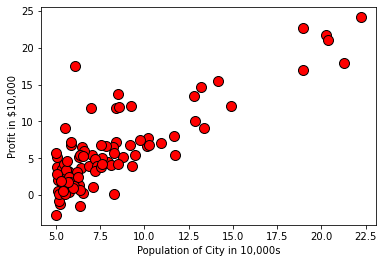

In [38]:
np.seterr(invalid='ignore')
 
data = np.loadtxt(os.path.join('Data','ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples

fig = pyplot.figure()
pyplot.plot(X, y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')


a=np.ones([m,1], dtype = int)#a is a vector of ones
X=np.c_[a,X]#adding vector of ones to desing matrix

X[:,1]


In [ ]:

w=weight_evaluation_using_bell_shaped_kernel(13, X[:,1], y, 0.5)

theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescentWithWeightedKernel(X ,y, w, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

fig = pyplot.figure()
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);
